# Diabetes Health Indicators — EDA and simple model
Explores a public health dataset (CDC BRFSS) to examine diabetes prevalence and predictors.
Focus: data cleaning, visualization, and a baseline logistic regression.


In [1]:
import zipfile

with zipfile.ZipFile('archive (1).zip', 'r') as z:
    z.extractall('.')
print("Unzipped files:")
import os
print(os.listdir('.'))


Unzipped files:
['.config', 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_012_health_indicators_BRFSS2015.csv', 'archive (1).zip', 'diabetes_binary_health_indicators_BRFSS2015.csv', 'sample_data']


In [2]:
import pandas as pd

# Load the main dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Show the first few rows
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Basic exploration
print("Shape:", df.shape)

print("\nInfo:")
df.info()

print("\nMissing value ratio (top 10):")
print(df.isna().mean().sort_values(ascending=False).head(10))

print("\nDescriptive statistics (first 12 rows):")
print(df.describe().T.head(12))


Shape: (253680, 22)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253

/tmp/ipython-input-750558550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=df, palette='coolwarm')


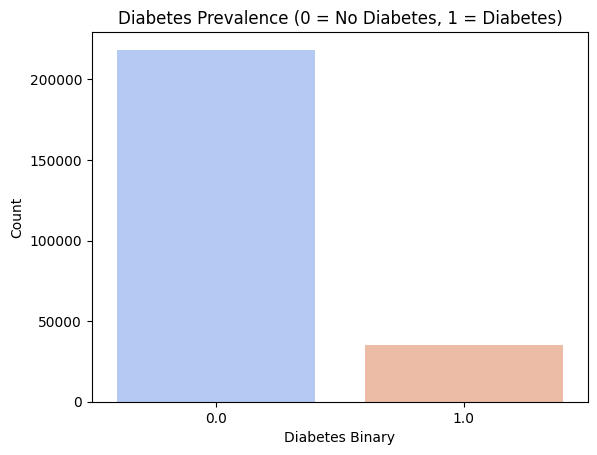

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetes_binary', data=df, palette='coolwarm')
plt.title('Diabetes Prevalence (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Diabetes Binary')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-3513803179.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diabetes_binary', y='BMI', data=df, palette='viridis')


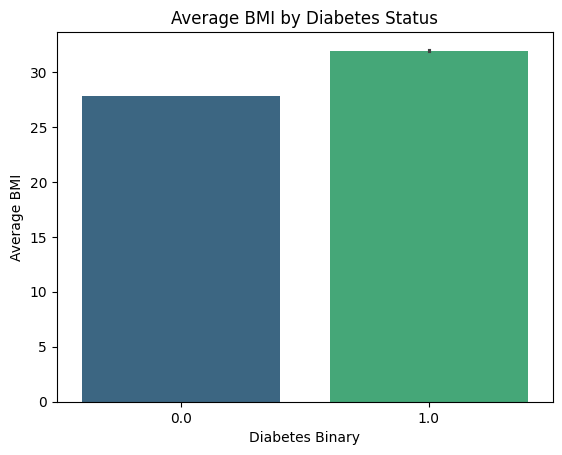

In [5]:
sns.barplot(x='Diabetes_binary', y='BMI', data=df, palette='viridis')
plt.title('Average BMI by Diabetes Status')
plt.xlabel('Diabetes Binary')
plt.ylabel('Average BMI')
plt.show()


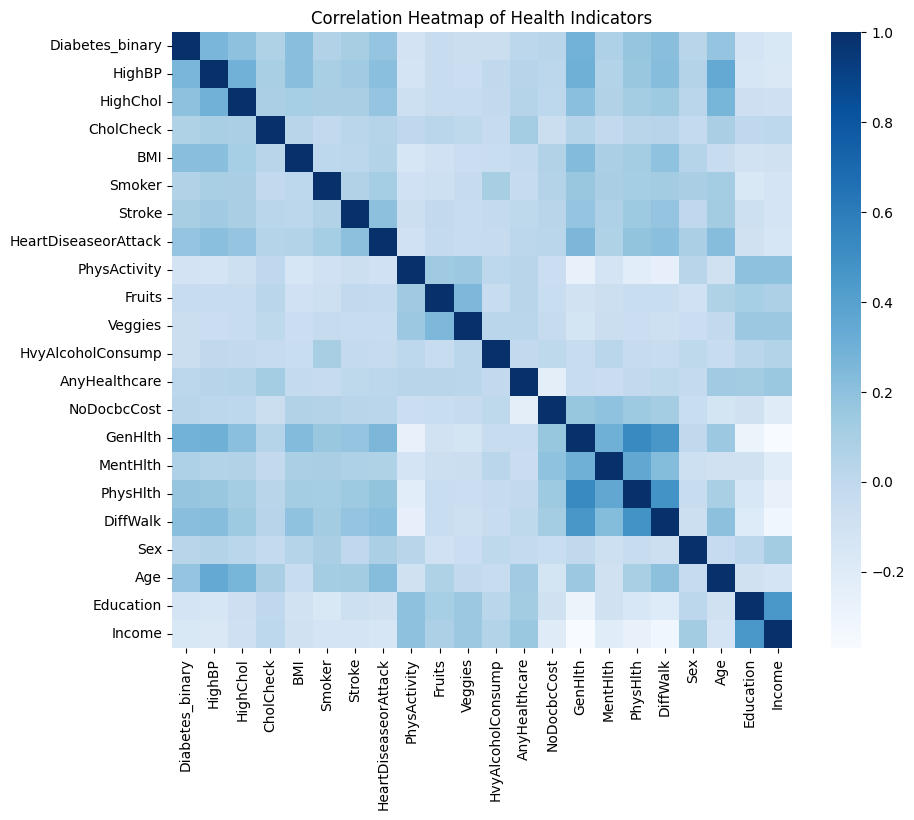

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Blues', annot=False)
plt.title('Correlation Heatmap of Health Indicators')
plt.show()
